<a href="https://colab.research.google.com/github/Gise05624/Proyecto_DataScience_I/blob/main/Entrega_1/ProyectoDSParteIBargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Actividad_visualizacion_en_python/ventas_dataset_actdeclase.csv")
df.head()

,Region,Producto,Mes,Ventas,Satisfaccion_Cliente,Costo_Operativo
0,Norte,Producto_A,2023-01,4174,4.593086,1794
1,Norte,Producto_A,2023-02,2130,4.559382,2138
2,Norte,Producto_A,2023-03,3169,3.311989,830
3,Norte,Producto_A,2023-04,2482,4.732352,630
4,Norte,Producto_A,2023-05,2685,3.112823,2891


In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

Graficos con Matplotbil

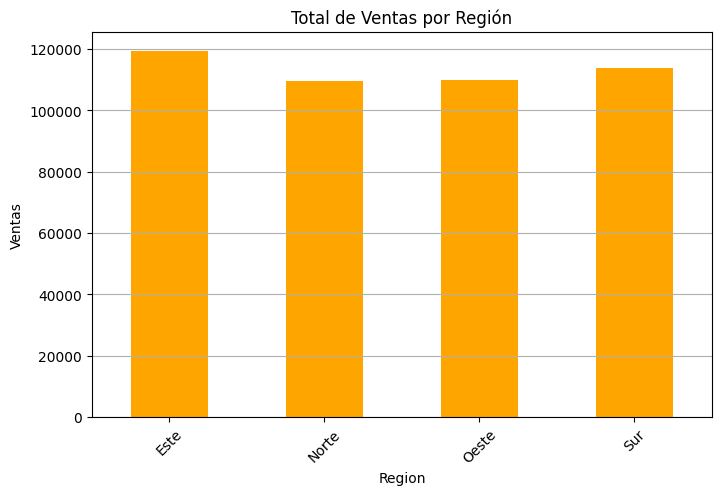

In [24]:
ventas_por_region = df.groupby('Region')['Ventas'].sum()
plt.figure(figsize=(8, 5))
ventas_por_region.plot(kind='bar', color='orange')
plt.title('Total de Ventas por Región')
plt.ylabel('Ventas')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

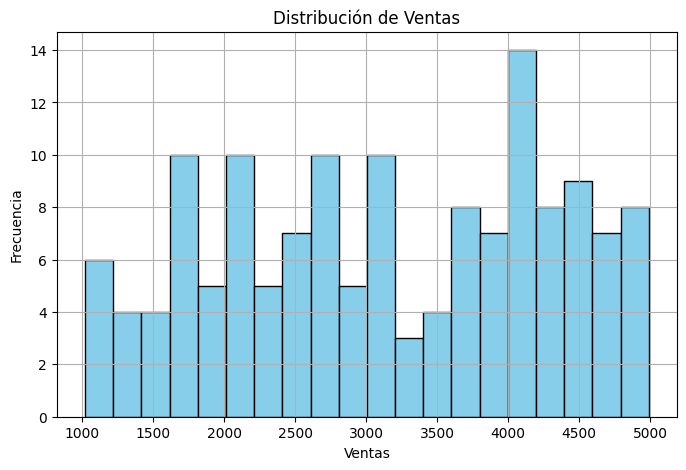

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(df['Ventas'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

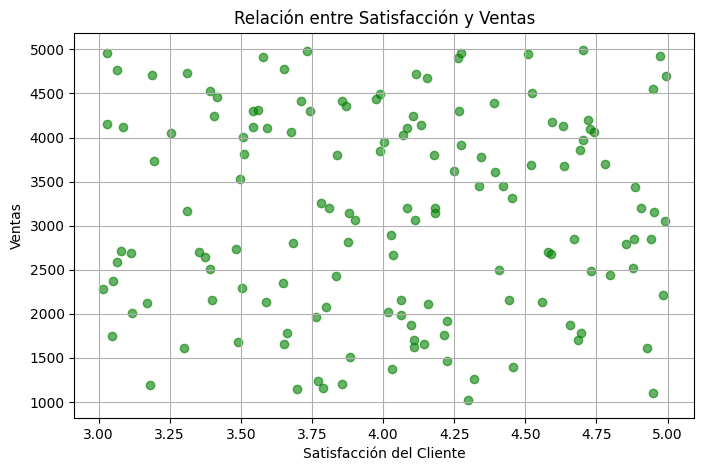

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Satisfaccion_Cliente'], df['Ventas'], alpha=0.6, color='green')
plt.title('Relación entre Satisfacción y Ventas')
plt.xlabel('Satisfacción del Cliente')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

Graficos con Seaborn

<ipython-input-34-84b080e69dfe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Producto', y='Ventas', palette='Set2')


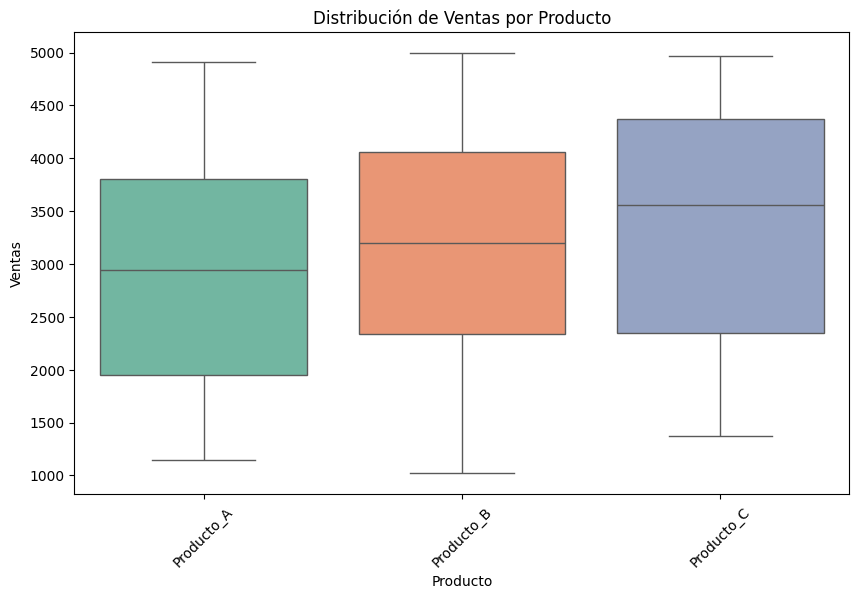

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Producto', y='Ventas', palette='Set2')
plt.title('Distribución de Ventas por Producto')
plt.xticks(rotation=45)
plt.show()

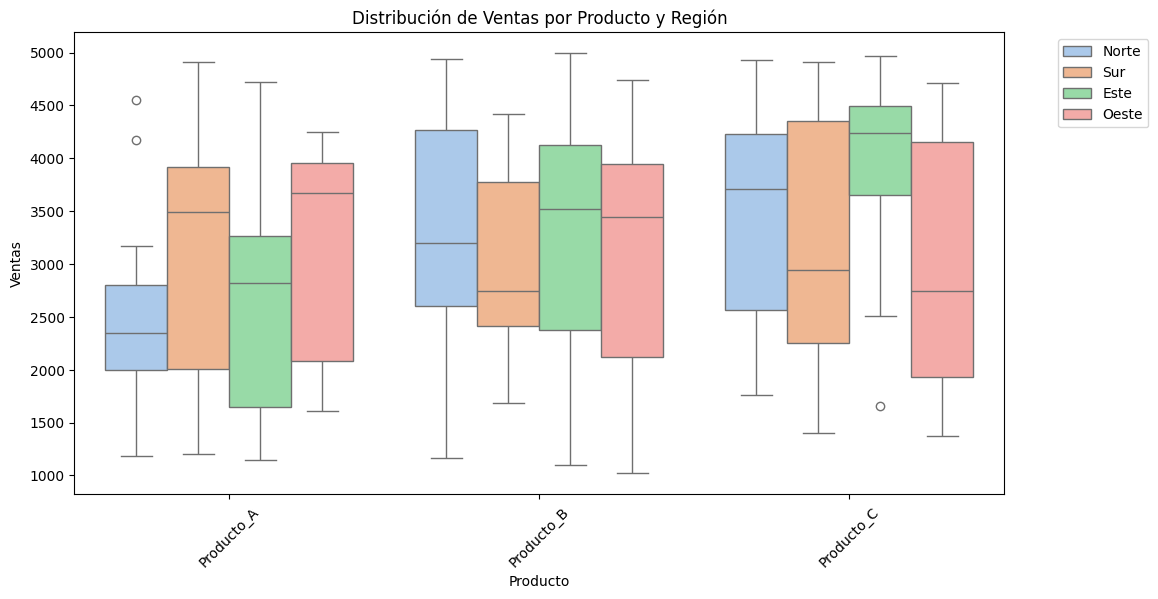

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Ventas', hue='Region', palette='pastel')
plt.title('Distribución de Ventas por Producto y Región')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

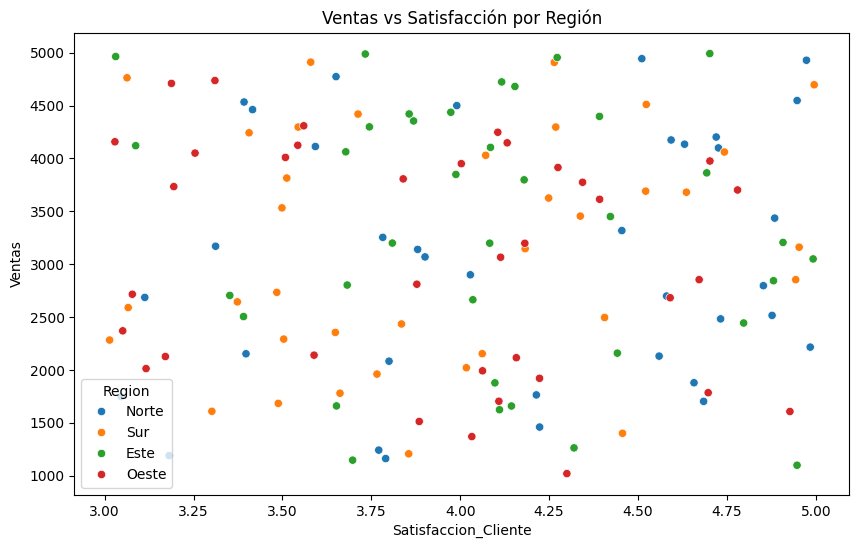

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Satisfaccion_Cliente', y='Ventas', hue='Region', palette='tab10')
plt.show()

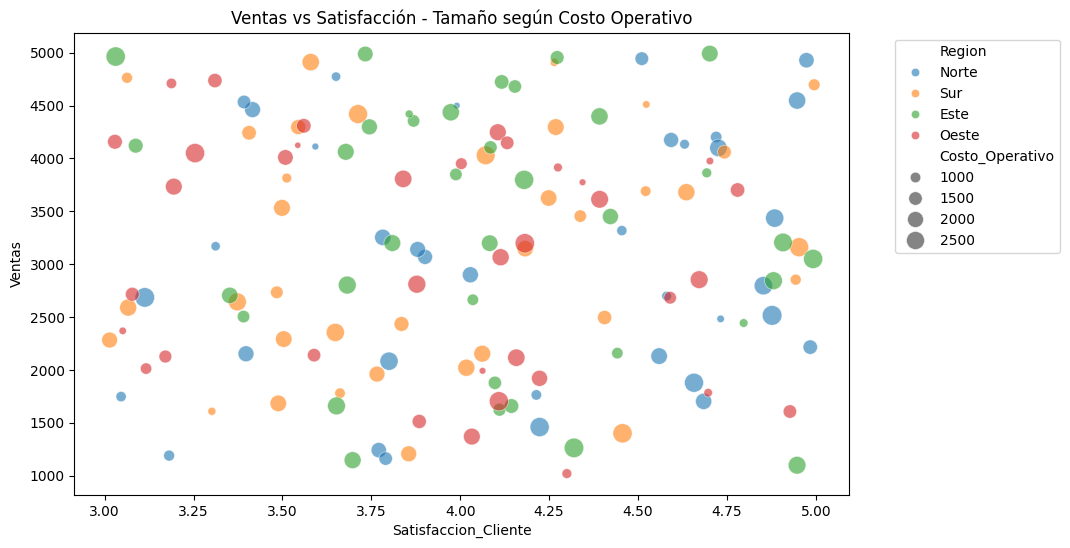

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Satisfaccion_Cliente', y='Ventas', size='Costo_Operativo', hue='Region', sizes=(20, 200), alpha=0.6)
plt.title('Ventas vs Satisfacción - Tamaño según Costo Operativo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

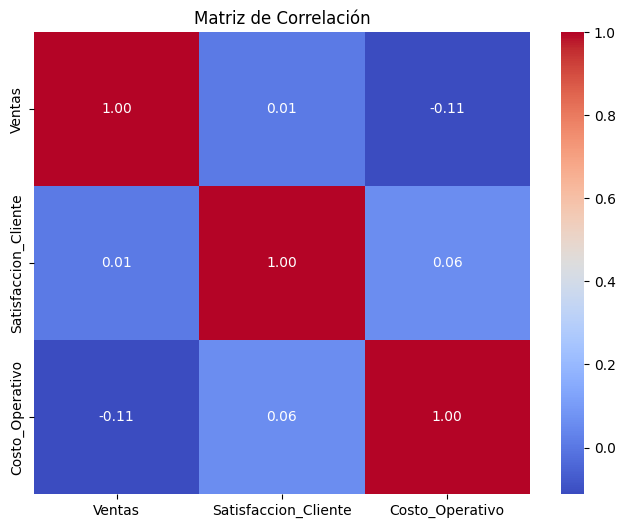

In [47]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

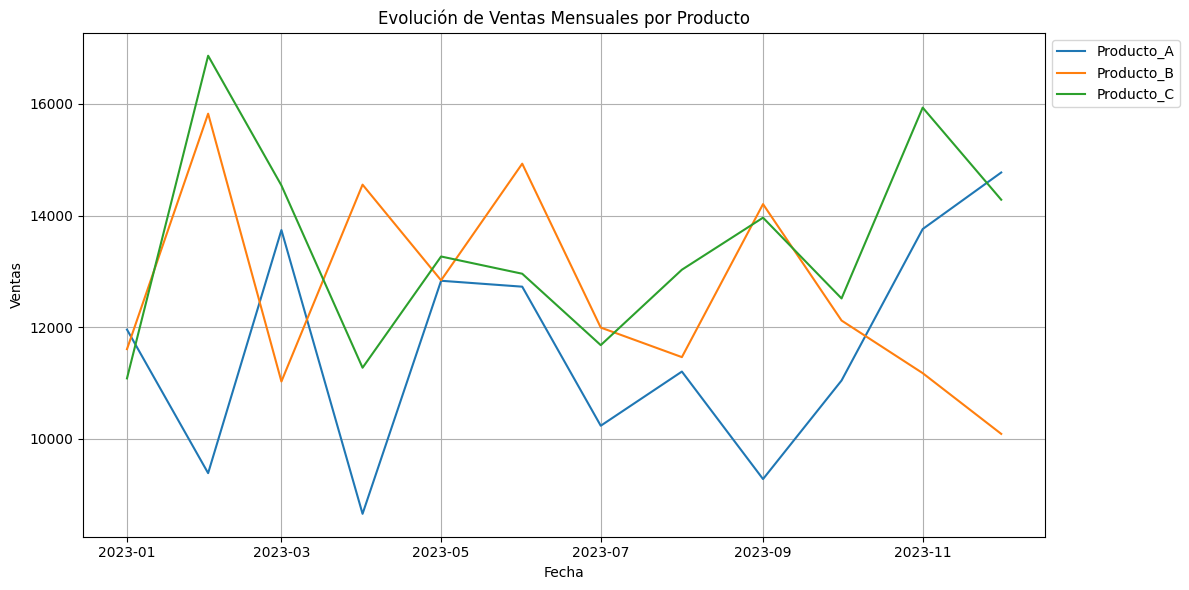

In [18]:
# Asegurar que la columna 'Mes' esté en formato datetime
df['Mes'] = pd.to_datetime(df['Mes'])

# Crear tabla pivote para productos vs tiempo
pivot_df = df.pivot_table(index='Mes', columns='Producto', values='Ventas', aggfunc='sum')

# Colores opcionales para trazar
colors = sns.color_palette("tab10")

# Gráfico de líneas para productos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.gca().set_prop_cycle(color=colors)

for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('Evolución de Ventas Mensuales por Producto')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

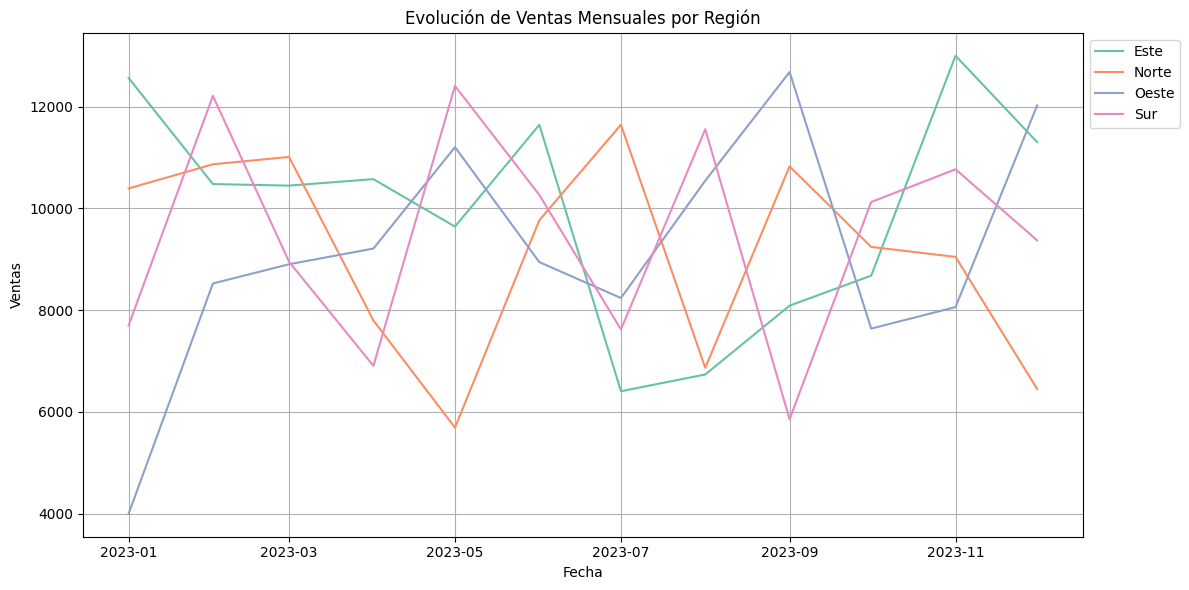

In [20]:
# Crear tabla pivote para regiones vs tiempo
pivot_region = df.pivot_table(index='Mes', columns='Region', values='Ventas', aggfunc='sum')

# Gráfico de líneas para regiones a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.gca().set_prop_cycle(color=sns.color_palette("Set2"))

for column in pivot_region.columns:
    plt.plot(pivot_region.index, pivot_region[column], label=column)

plt.title('Evolución de Ventas Mensuales por Región')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()